## Import Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

## Load data from CSV file

In [16]:
file_path = 'food_expiry_large_data.csv'  
food_df = pd.read_csv(file_path)

## Convert Expiry Date to datetime format

In [17]:
food_df['Expiry Date'] = pd.to_datetime(food_df['Expiry Date'], errors='coerce')
food_df.dropna(subset=['Expiry Date'], inplace=True)
food_df['Days Left'] = (food_df['Expiry Date'] - datetime.today()).dt.days

## Ensure 'Days Left' has no negative values

In [18]:
food_df = food_df[food_df['Days Left'] >= 0]

## Normalizing the data using StandardScaler

In [19]:
if not food_df.empty:
    scaler = StandardScaler()
    scaled_df = scaler.fit_transform(food_df[['Days Left']])

## Display the scaled data

In [20]:
print(pd.DataFrame(scaled_df, columns=['Days Left']).head())

   Days Left
0  -0.357014
1  -0.450734
2   0.655154
3  -0.375758
4  -0.225807


 ## Determine optimal number of clusters using Elbow Method

In [23]:
inertia = []
k_range = range(1, 11)
for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(scaled_df)
        inertia.append(kmeans.inertia_)

## Plot the inertia values to find the elbow point

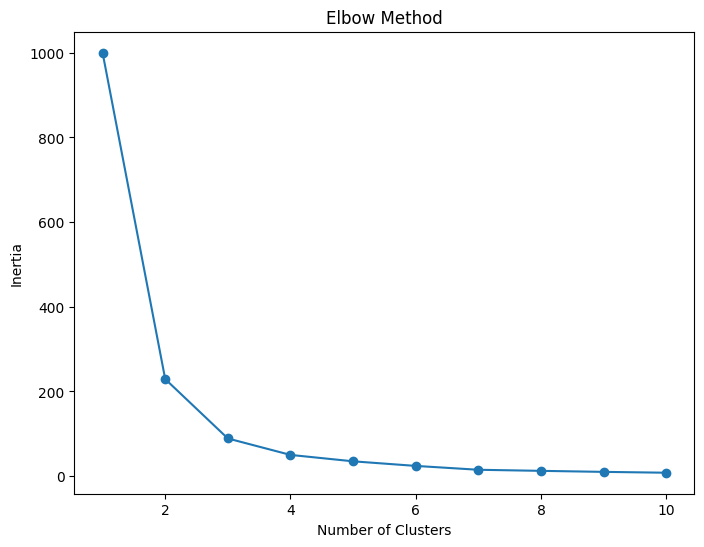

In [24]:
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

## Apply K-Means Clustering with optimal k (assuming k=3 from Elbow Method)

In [25]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
food_df['Cluster'] = kmeans.fit_predict(scaled_df)

 ## Compute silhouette score

In [26]:
sil_score = silhouette_score(scaled_df, food_df['Cluster'])
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.867596323449049


 ## Visualizing the clusters

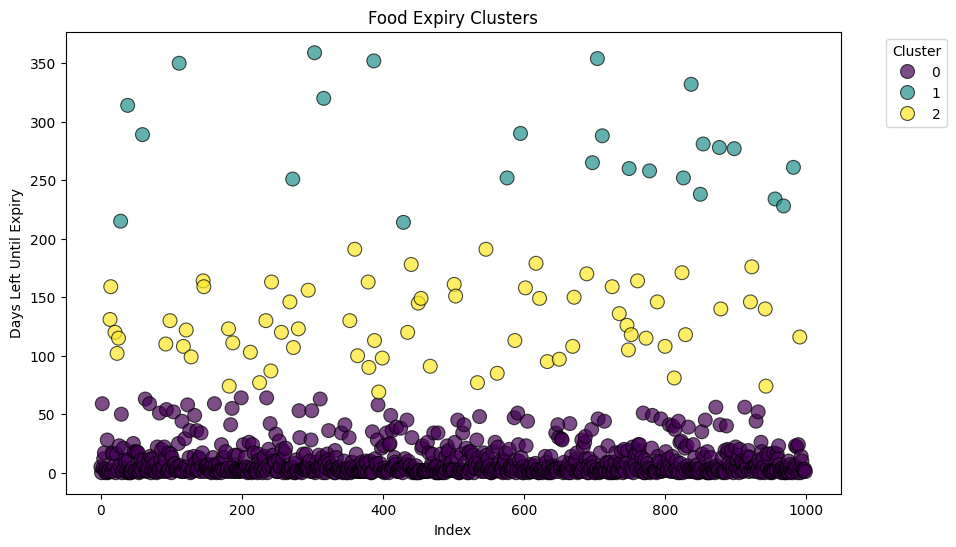

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=food_df.index, y=food_df['Days Left'], hue=food_df['Cluster'], palette='viridis', s=100, alpha=0.7, edgecolor='k')
plt.xlabel('Index')
plt.ylabel('Days Left Until Expiry')
plt.title('Food Expiry Clusters')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Recipe Suggestion Model (Simple Rule-Based)

In [28]:
recipes = {
    'Milk': ['Pancakes', 'Milkshake'],
    'Bread': ['Sandwich', 'Bread Pudding'],
    'Eggs': ['Omelette', 'Scrambled Eggs'],
    'Tomatoes': ['Tomato Soup', 'Salad'],
    'Cheese': ['Grilled Cheese', 'Mac & Cheese'],
    'Chicken': ['Chicken Curry', 'Grilled Chicken'],
    'Rice': ['Fried Rice', 'Rice Pudding'],
    'Lettuce': ['Salad', 'Wrap'],
    'Yogurt': ['Smoothie', 'Parfait'],
    'Apples': ['Apple Pie', 'Fruit Salad'],
    'Banana': ['Banana Bread', 'Smoothie'],
    'Fish': ['Grilled Fish', 'Fish Curry'],
    'Potatoes': ['Mashed Potatoes', 'French Fries'],
    'Carrots': ['Carrot Soup', 'Stir Fry'],
    'Oranges': ['Orange Juice', 'Fruit Salad'],
    'Peppers': ['Stuffed Peppers', 'Stir Fry'],
    'Spinach': ['Spinach Salad', 'Smoothie'],
    'Butter': ['Butter Chicken', 'Garlic Bread'],
    'Cereal': ['Cereal with Milk', 'Granola Bars'],
    'Pasta': ['Pasta Salad', 'Spaghetti']
}

def suggest_recipes(food_df):
    expiring_soon = food_df[food_df['Days Left'] <= 3]
    for _, row in expiring_soon.iterrows():
        print(f"{row['Food Item']} is expiring soon! Suggested recipes: {', '.join(recipes.get(row['Food Item'], ['No recipes available']))}")


if not food_df.empty:
    suggest_recipes(food_df)

Tomatoes is expiring soon! Suggested recipes: Tomato Soup, Salad
Banana is expiring soon! Suggested recipes: Banana Bread, Smoothie
Spinach is expiring soon! Suggested recipes: Spinach Salad, Smoothie
Spinach is expiring soon! Suggested recipes: Spinach Salad, Smoothie
Eggs is expiring soon! Suggested recipes: Omelette, Scrambled Eggs
Cheese is expiring soon! Suggested recipes: Grilled Cheese, Mac & Cheese
Chicken is expiring soon! Suggested recipes: Chicken Curry, Grilled Chicken
Apples is expiring soon! Suggested recipes: Apple Pie, Fruit Salad
Chicken is expiring soon! Suggested recipes: Chicken Curry, Grilled Chicken
Chicken is expiring soon! Suggested recipes: Chicken Curry, Grilled Chicken
Chicken is expiring soon! Suggested recipes: Chicken Curry, Grilled Chicken
Fish is expiring soon! Suggested recipes: Grilled Fish, Fish Curry
Peppers is expiring soon! Suggested recipes: Stuffed Peppers, Stir Fry
Lettuce is expiring soon! Suggested recipes: Salad, Wrap
Chicken is expiring soon